# Read Data Example
This example covers:
1. Reading data (NEXUS, text, CDI)
2. Normalisation and Cropping
3. Plotting data

Reading is shown using published data for the articles:

This includes nexus data and text data

After reading the data is presented as a plot.

Normalisation and cropping are common processing operations are also followed by ploting the data so that the changes can be visualised.

## Resources
Pyhon modules and libraries used in this example

In [1]:
# code for importing custom helper libraries
import sys
# moved all custom helper libraries to a level bellow this directory.
sys.path.append('../lib/')

# Library with the functions that provide the larch functionalities
# equivalent to those provided by athena including normalisation, 
# merging, re-binning, LCF and visualisation (plotting)
import manage_athena as athenamgr 

# additional custom plot functions (replicate plots in published papers)
import custom_plots

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

## Varaibles
Variables used for reading data and holding results

In [2]:
# location for the data used in this example
data_path = Path("../wf_data/pub_037/XAFS_prj/Sn K-edge/ascii")

# mappings for the files being read
data_mappings={"PtSn":  "*_PtSn_OC_A*",
              "Air":  "*_PtSn_OCO_A*",
              "Ar":  "*_PtSn_OCA_A*",
              "H2":  "*_PtSn_OCH_A*",
              "PtSn H":  "*_PtSn_OC_H*", 
              "Air H":  "*_PtSn_OCO_H*",
              "Ar H":  "*_PtSn_OCA_H*",
              "H2 H":  "*_PtSn_OCH_H*",}

# labels of the data colums in the files 
column_labels = "energy time I0 It Iref  mu lnItIref"

## 1 Read data

The process below reads the data and merges the files indicated by the data mappings

In [3]:
merged_results={}
# read all samples, merge and then normalise
for a_sample in data_mappings:
    files_list = athenamgr.get_files_list(data_path, data_mappings[a_sample])

    # read the files for each sample
    sample_list = []
    for i_count, a_file  in enumerate(files_list):
        file_name = a_file.name
        f_suffix = str(i_count).zfill(4) 
        a_group = athenamgr.read_text(a_file, column_labels)
        sample_list.append(a_group)
    
    # merge readings for sample
    merged_xas = athenamgr.merge_readings(sample_list)

    # rename group (same as the file name)
    merged_xas.filename = a_sample
    merged_results[a_sample] = merged_xas
    

## 2 Plot data

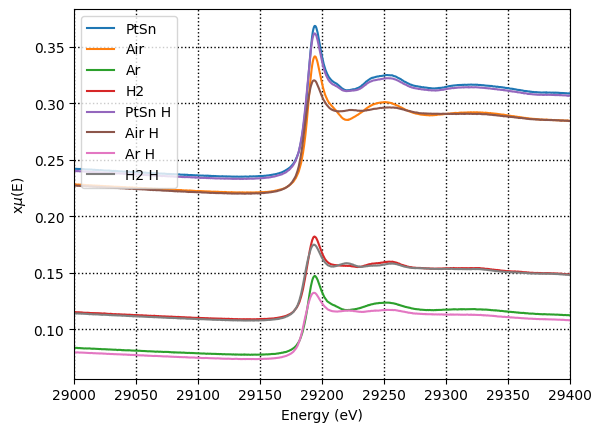

In [4]:
for a_sample in merged_results:
   plt = athenamgr.plot_mu(merged_results[a_sample])

plt.title("")
plt.xlim([29000, 29400])
plt.show()


# normalise

In [5]:
for a_sample in merged_results:
    # calculate pre-edge, edge and anormalise each group
    # using defaults
    athenamgr.fit_pre_post_edge(merged_results[a_sample])

# Save athena project

In [7]:
athenamgr.save_groups(merged_results.values(), "Read_Normalise.prj")